In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import numpy as np
import os
# Dataset de origem
DS_O = "./data/dataset.csv"
# Dataset Transformado
DS_T = "./data/dataset_transformed.csv"

# Mapeamento dos nomes das variáveis para português
column_mapping = {
    'GENDER': 'Gênero',
    'AGE': 'Idade',
    'SMOKING': 'Fuma',
    'YELLOW_FINGERS': 'Dedos Amarelos',
    'ANXIETY': 'Ansiedade',
    'PEER_PRESSURE': 'Pressão dos Colegas',
    'CHRONIC_DISEASE': 'Doença Crônica',
    'FATIGUE': 'Fadiga',
    'ALLERGY': 'Alergia',
    'WHEEZING': 'Chiado no Peito',
    'ALCOHOL_CONSUMING': 'Consumo de Álcool',
    'COUGHING': 'Tosse',
    'SHORTNESS_OF_BREATH': 'Falta de Ar',
    'SWALLOWING_DIFFICULTY': 'Dificuldade para Engolir',
    'CHEST_PAIN': 'Dor no Peito',
    'LUNG_CANCER': 'Câncer de pulmão',
}

In [2]:
def transform_o():
    """
        Transforma os dados de origem.
        Mapeia as variáveis de classes (1,2) para (0,1)
        Mapeia ('M','F') para (0,1)
        Mapeia ("NO", "YES") para (0,1)
        Salva como novo csv $DS_T o dataframe resultante, se não existente.
    """
    if os.path.exists(DS_T):
        return False
    df = pd.read_csv(DS_O)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = [col[:-1] if col.endswith('_') else col for col in df.columns]

    mapping = {1: 0, 2: 1}
    columns = ['SMOKING', 'YELLOW_FINGERS', 
           'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 
           'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 
           'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 
           'CHEST_PAIN']
    # Mapeando para 0 e 1
    df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
    df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

    df[columns] = df[columns].apply(lambda x: x.map(mapping))
    df.to_csv(DS_T, index=False)
    return True

In [3]:
transform_o()

df = pd.read_csv(DS_T)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
proportions = y.value_counts(normalize=True)

In [4]:
print("Proporção de pessoas com e sem câncer de pulmão no dataset")
print(f"Sem câncer: {proportions[0]}\nCom câncer: {proportions[1]}")

Proporção de pessoas com e sem câncer de pulmão no dataset
Sem câncer: 0.1262135922330097
Com câncer: 0.8737864077669902


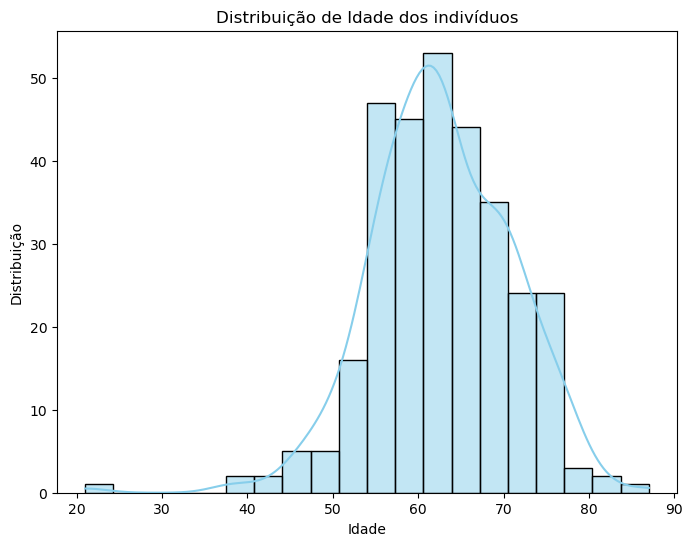

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(X['AGE'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição de Idade dos indivíduos')
plt.xlabel('Idade')
plt.ylabel('Distribuição')
plt.show()


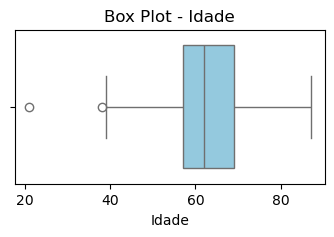

In [6]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=X['AGE'], color='skyblue')
plt.title('Box Plot - Idade')
plt.xlabel('Idade')
plt.show()


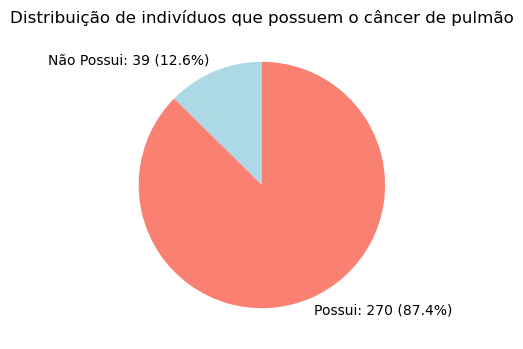

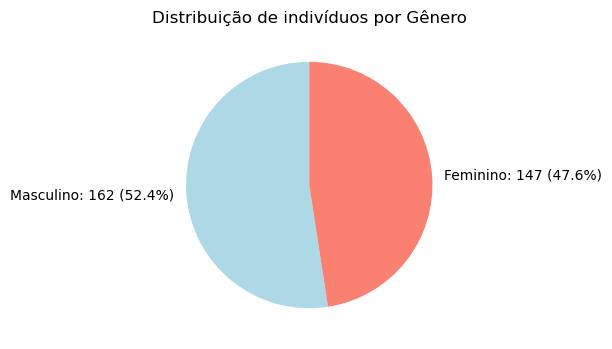

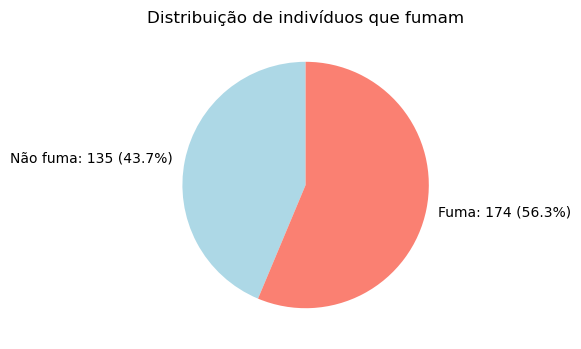

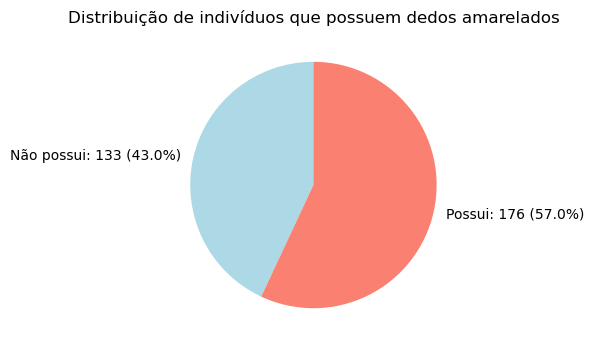

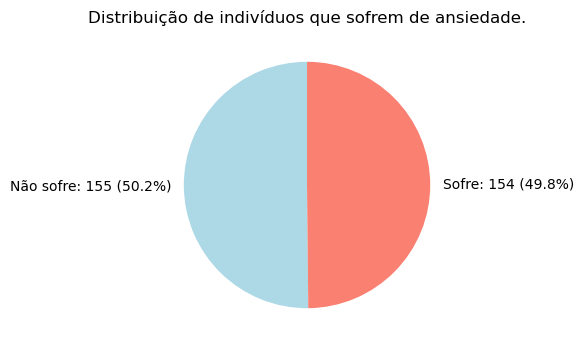

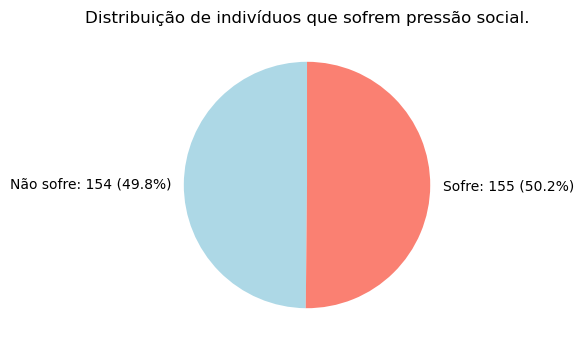

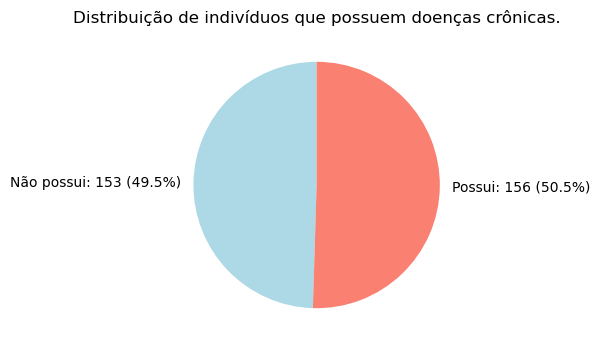

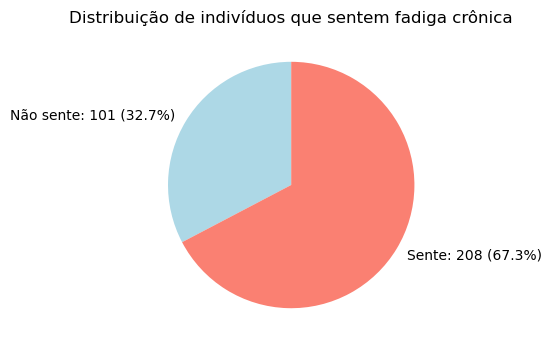

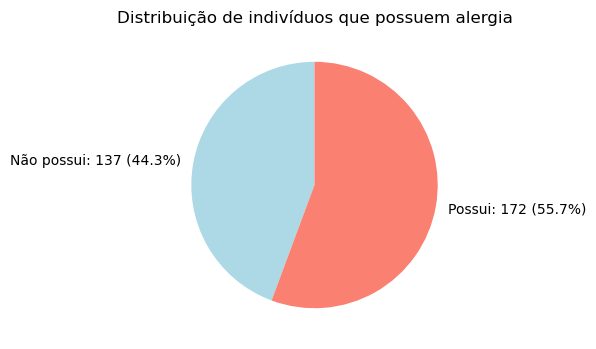

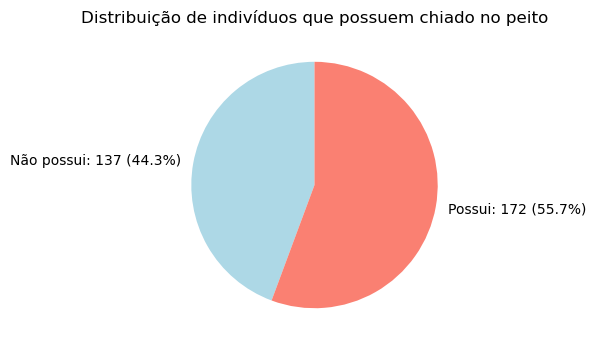

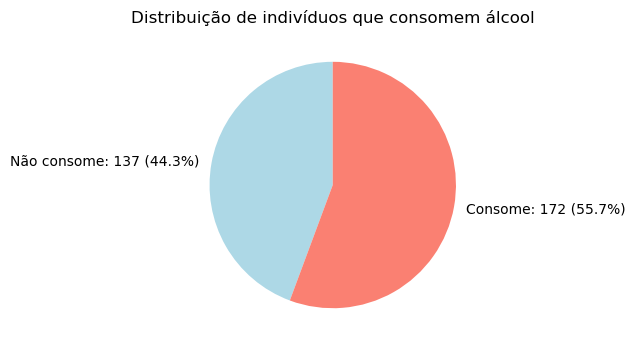

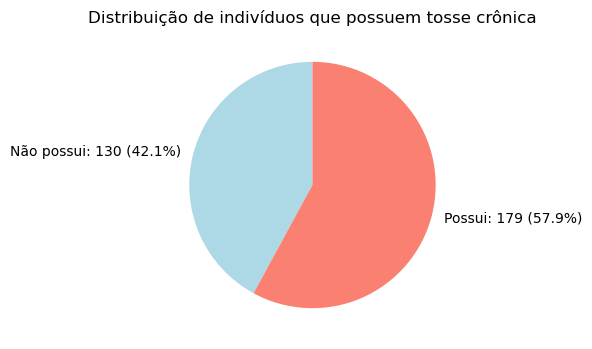

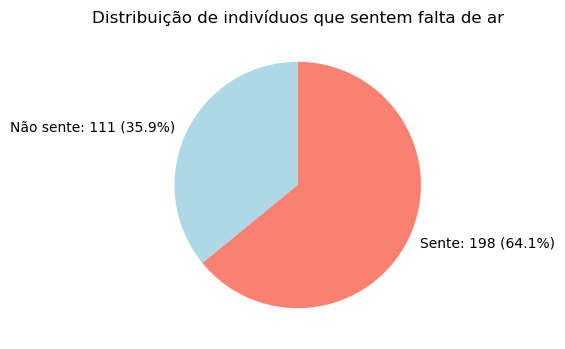

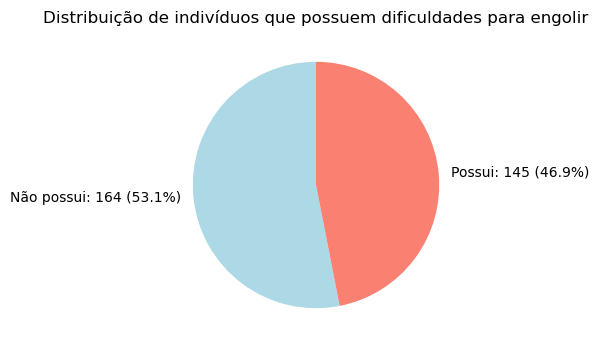

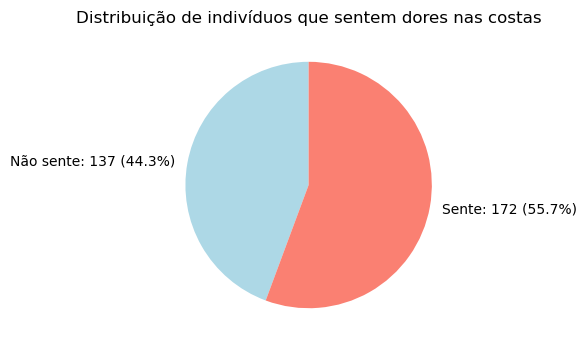

In [7]:
col = [('LUNG_CANCER', 'Não Possui', 'Possui', 'que possuem o câncer de pulmão'),
       ('GENDER', 'Masculino', 'Feminino', 'por Gênero'),
       ('SMOKING', 'Não fuma', 'Fuma', 'que fumam'),
       ('YELLOW_FINGERS', 'Não possui', 'Possui', 'que possuem dedos amarelados'),
       ('ANXIETY', 'Não sofre', 'Sofre', 'que sofrem de ansiedade.'),
       ('PEER_PRESSURE', 'Não sofre', 'Sofre', 'que sofrem pressão social.'),
       ('CHRONIC_DISEASE', 'Não possui', 'Possui', 'que possuem doenças crônicas.'),
       ('FATIGUE', 'Não sente', 'Sente', 'que sentem fadiga crônica'),
       ('ALLERGY', 'Não possui', 'Possui', 'que possuem alergia'),
       ('WHEEZING', 'Não possui', 'Possui', 'que possuem chiado no peito'),
       ('ALCOHOL_CONSUMING', 'Não consome', 'Consome', 'que consomem álcool'),
       ('COUGHING', 'Não possui', 'Possui', 'que possuem tosse crônica'),
       ('SHORTNESS_OF_BREATH', 'Não sente', 'Sente', 'que sentem falta de ar'),
       ('SWALLOWING_DIFFICULTY', 'Não possui', 'Possui', 'que possuem dificuldades para engolir'),
       ('CHEST_PAIN', 'Não sente', 'Sente', 'que sentem dores nas costas'),
      ]

for c in col:
    col_distribution = df[c[0]].value_counts()
    col_labels = [c[1], c[2]]
    
    # para começar pelo index 0
    col_distribution = col_distribution.reindex([0, 1], fill_value=0)
    
    # cálculo da porcentagem
    col_percentage = (col_distribution / col_distribution.sum()) * 100
    
    
    custom_labels = [
        f"{col_labels[i]}: {col_distribution[i]} ({col_percentage[i]:.1f}%)"
        for i in range(len(col_distribution))
    ]
    
    
    plt.figure(figsize=(4, 4))
    plt.pie(col_distribution, labels=custom_labels, startangle=90, colors=['lightblue', 'salmon'])
    plt.title("Distribuição de indivíduos " + c[3])
    
    plt.show()


## Correlação entre as variáveis independentes

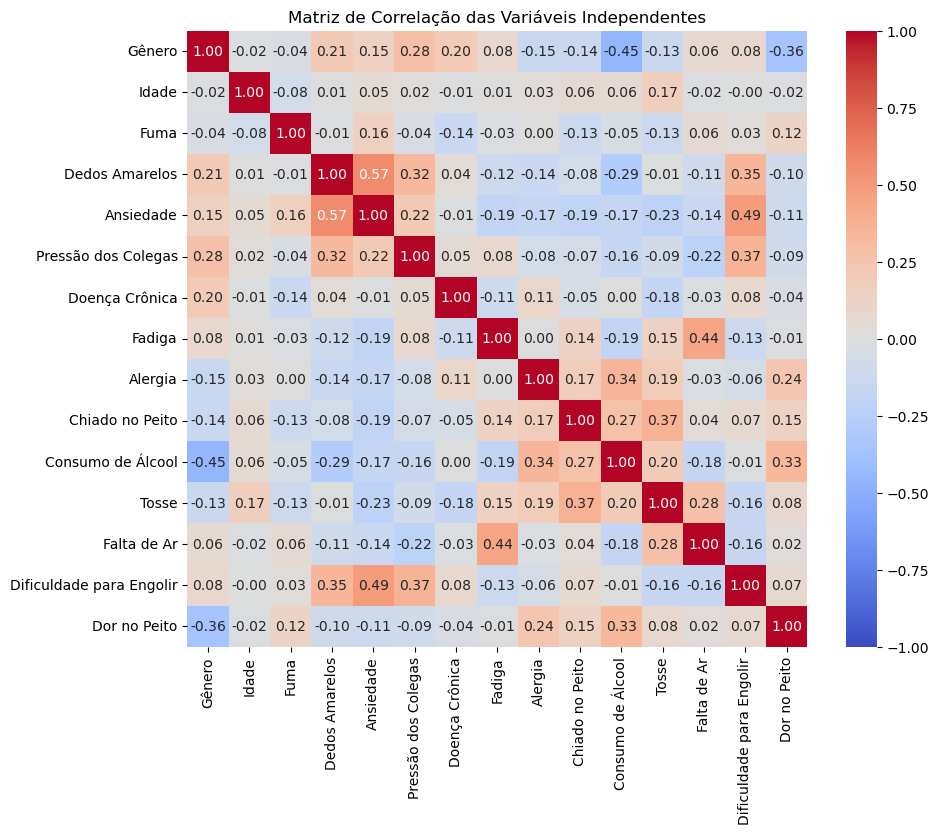

In [11]:
# Renomeando as colunas com o mapeamento
X_o = X.copy()
X_o.rename(columns=column_mapping)

# Calcular a correlação entre as variáveis independentes
correlation_matrix = X_o.corr()

# Exibir a matriz de correlação
# print(correlation_matrix)

# Visualizar a matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Título do gráfico
plt.title('Matriz de Correlação das Variáveis Independentes')
plt.show()


## Correlação entre variáveis e a variável dependente
Utilizamos `df['AGE'].corr(df['LUNG_CANCER'])` para calcular a correlação de Pearson entre a variável numérica `AGE` e a variável binária LUNG_CANCER. O resultado será um valor entre -1 e 1 que nos diz o grau de correlação linear entre as duas variáveis.

Para cada variável binária, usamos `pd.crosstab(df[column], df['LUNG_CANCER'])` para construir uma tabela de contingência. Esta tabela mostra a distribuição conjunta de duas variáveis categóricas, no caso a variável binária e `LUNG_CANCER`.



<Figure size 1200x800 with 0 Axes>

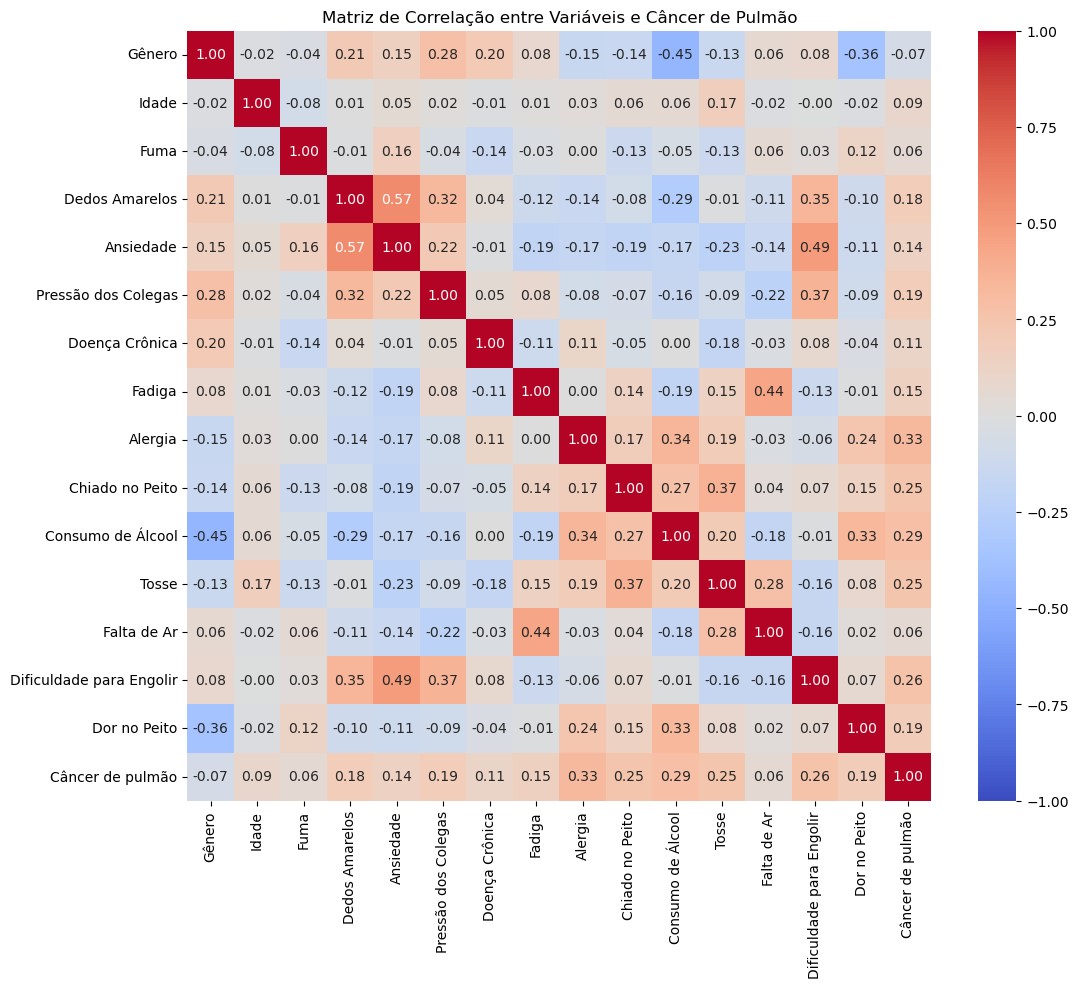

In [12]:
# Configurar para exibição de tabelas e gráficos
plt.figure(figsize=(12, 8))
df_t = df.copy()
df_t = df.rename(columns=column_mapping)
correlation_matrix = df_t.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis e Câncer de Pulmão')
plt.show()


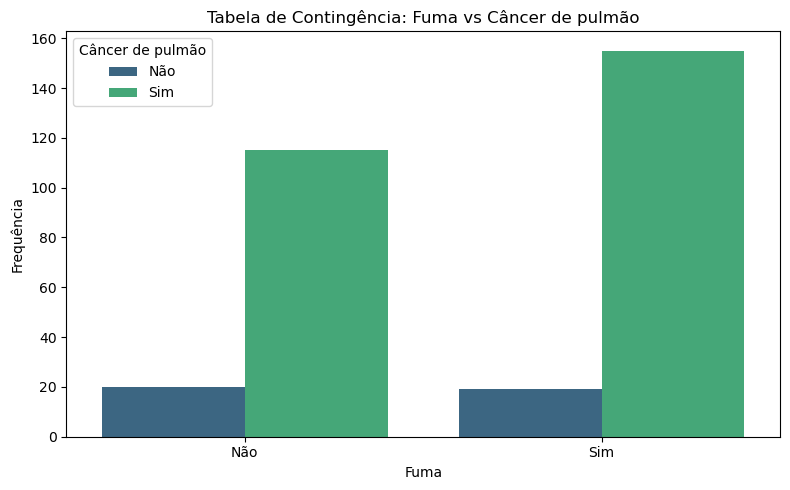

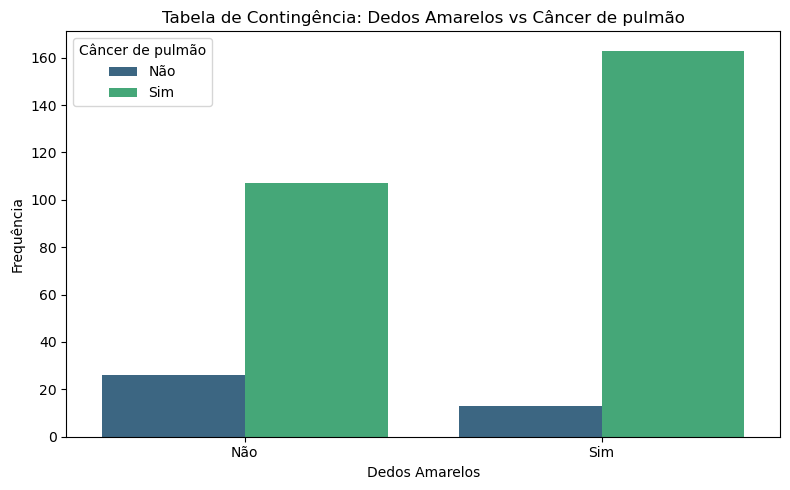

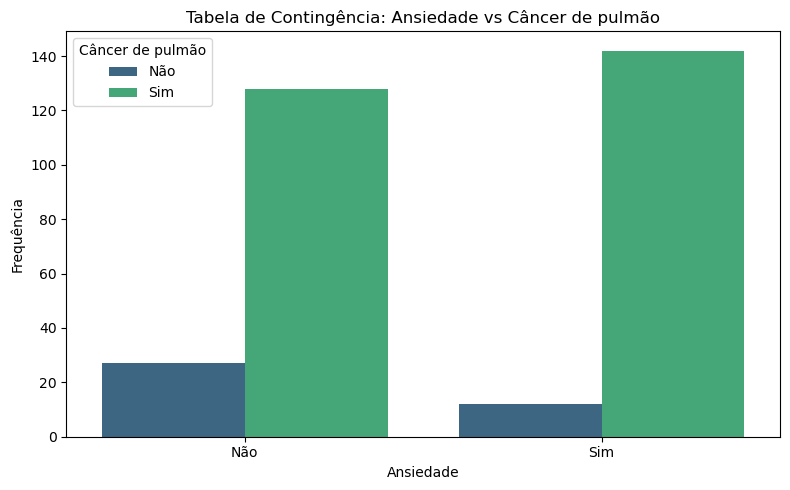

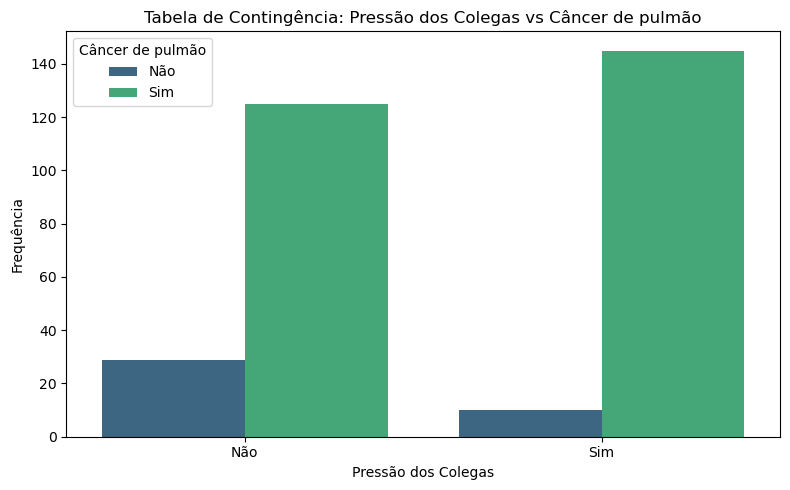

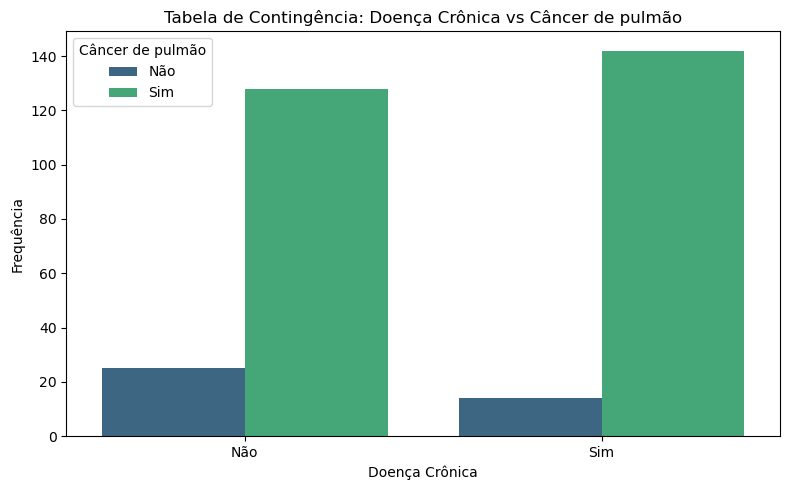

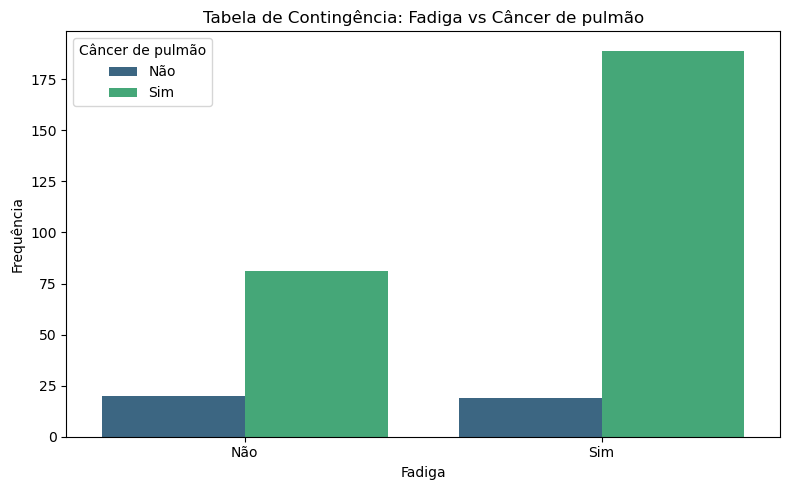

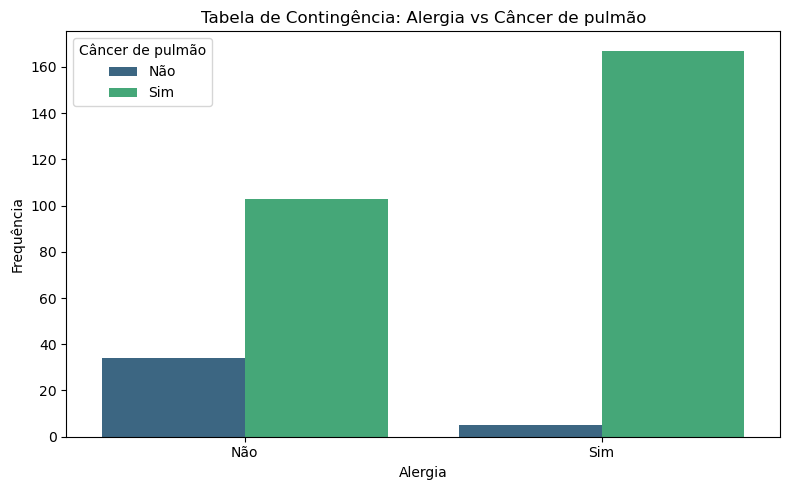

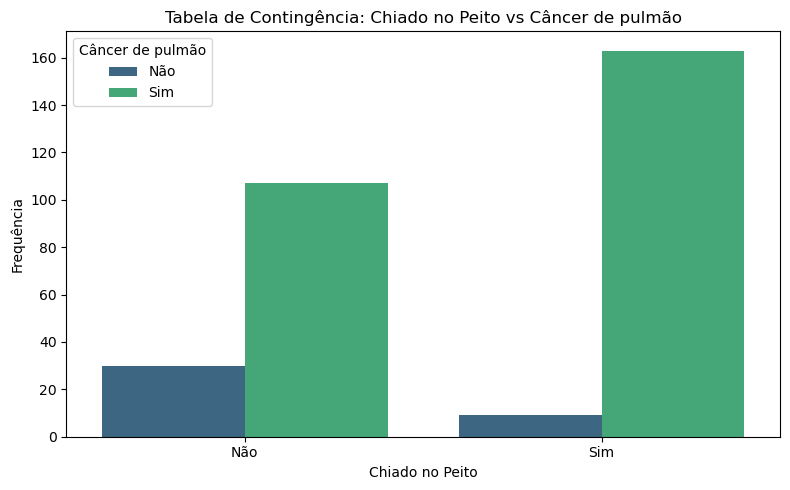

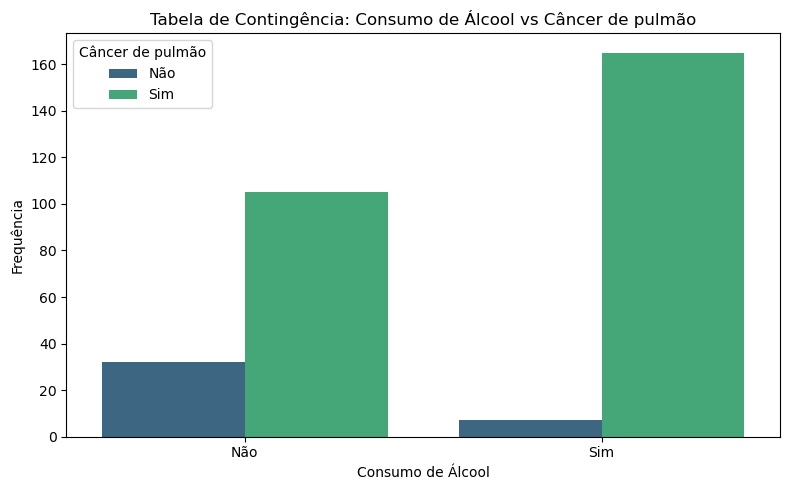

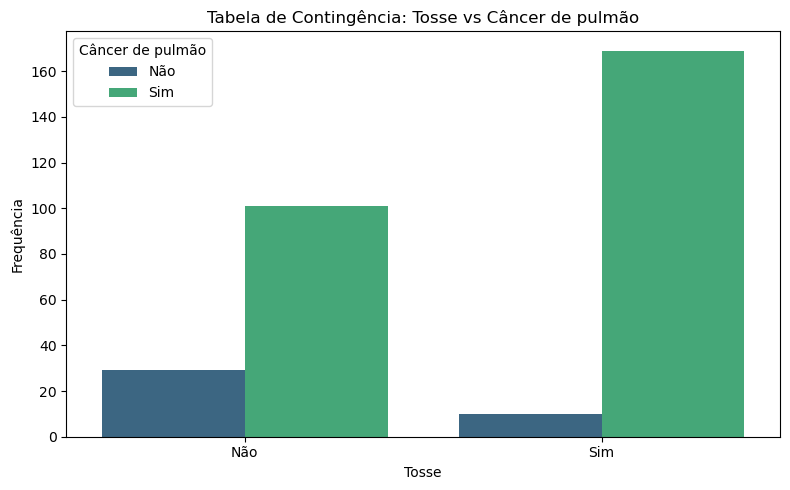

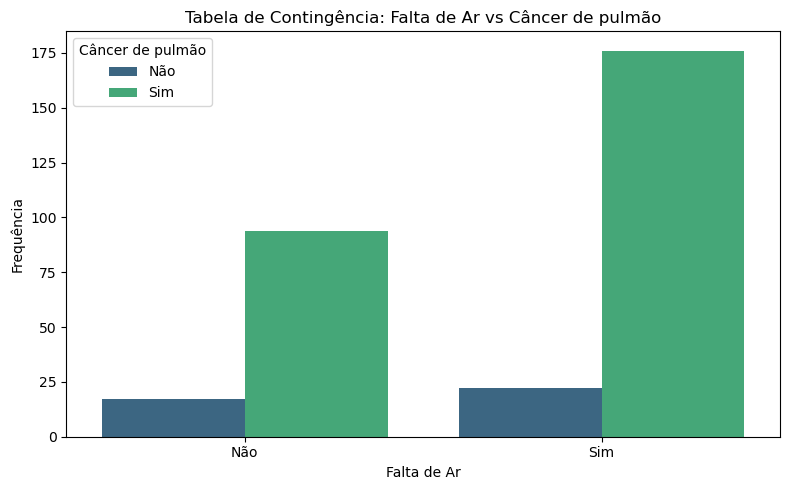

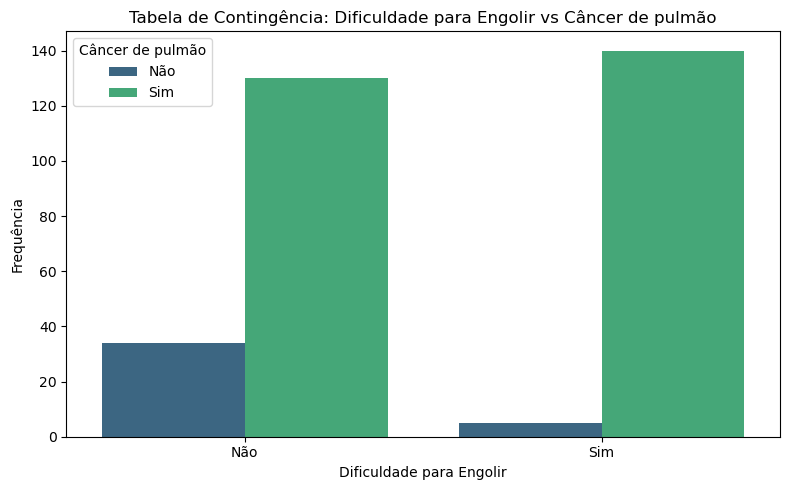

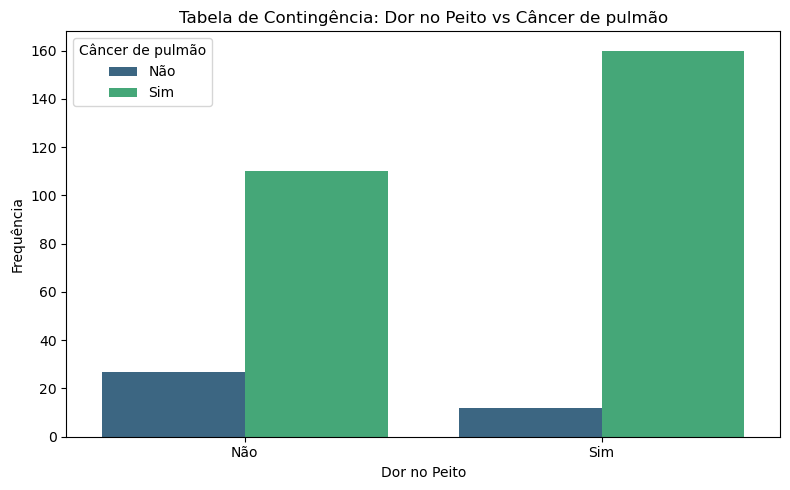

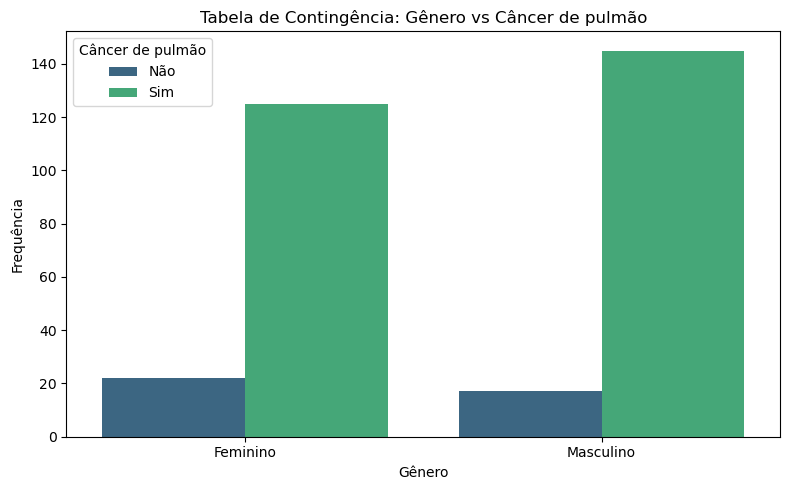

In [15]:
# Substituir 0 por "Não" e 1 por "Sim"
df_mapped = df.replace({0: 'Não', 1: 'Sim'})
# Mapeando GENDER para "Masculino" e "Feminino"
gender_map = {"Não": "Masculino", "Sim": "Feminino"}
df_mapped["GENDER"] = df_mapped["GENDER"].map(gender_map)

# Lista de colunas binárias para análise
binary_columns = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING',
    'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'GENDER'
]

# Armazenar resultados
results = []

# plotar tabelas de contingência com barras lado a lado (em pares)
for column in binary_columns:
    # Tabela de contingência
    contingency_table = pd.crosstab(df_mapped[column], df_mapped['LUNG_CANCER'])
    # Teste Qui-quadrado
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    results.append({'Variable': column, 'p_value': p})

    # Preparar dados para plotagem
    contingency_table = contingency_table.reset_index().melt(id_vars=column, var_name='LUNG_CANCER', value_name='Frequência')

    # Plotar como barras lado a lado
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=contingency_table,
        x=column,
        y='Frequência',
        hue='LUNG_CANCER',
        palette='viridis',
        dodge=True
    )
    plt.title(f'Tabela de Contingência: {column_mapping[column]} vs {column_mapping["LUNG_CANCER"]}')

    plt.xlabel(column_mapping[column])

    plt.ylabel('Frequência')

    plt.xticks(rotation=0)

    plt.legend(title=column_mapping["LUNG_CANCER"], loc='best')

    plt.tight_layout()

    plt.show()
# Exibir resultados do teste
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='p_value', ascending=True)
# results_df

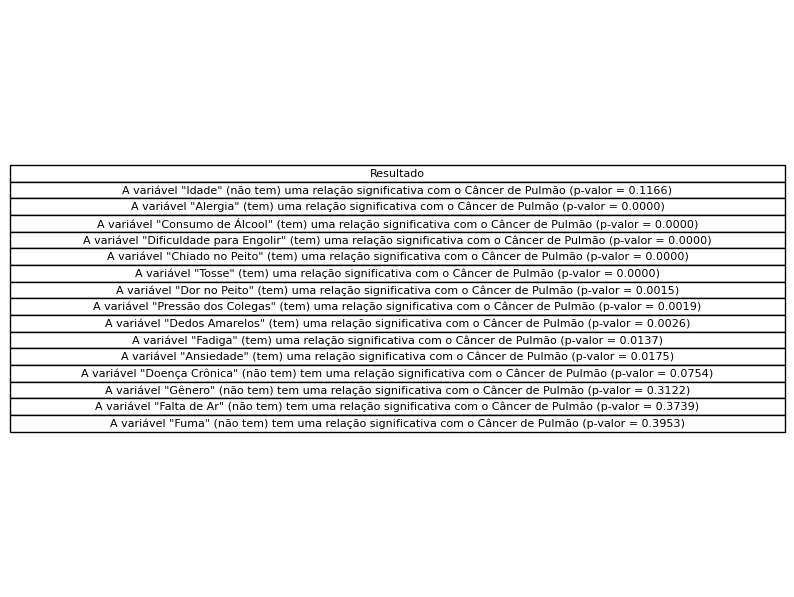

In [16]:
# Lista para armazenar as frases de resultados dos testes
hypothesis_results = []

# Nível de significância
alpha = 0.05

# Calcular a correlação de Pearson entre AGE e LUNG_CANCER
correlation, p_value = pearsonr(df['AGE'], df['LUNG_CANCER'])

# Criar a frase do resultado do teste de hipótese
if p_value < alpha:
    result_text = f'A variável "Idade" (tem) uma relação significativa com o Câncer de Pulmão (p-valor = {p_value:.4f})'
else:
    result_text = f'A variável "Idade" (não tem) uma relação significativa com o Câncer de Pulmão (p-valor = {p_value:.4f})'

# Adicionar o resultado ao hypothesis_results
hypothesis_results.append({
    'Variável': 'Idade',
    'Resultado': result_text
})

# Iterar sobre os resultados dos testes de hipótese e criar frases
for index, row in results_df.iterrows():
    p_value = row['p_value']
    column = row['Variable']
    
    # Verificar a relação
    if p_value < alpha:
        result_text = f'A variável "{column_mapping[column]}" (tem) uma relação significativa com o Câncer de Pulmão (p-valor = {p_value:.4f})'
    else:
        result_text = f'A variável "{column_mapping[column]}" (não tem) tem uma relação significativa com o Câncer de Pulmão (p-valor = {p_value:.4f})'
    
    # Adicionar a frase à lista
    hypothesis_results.append({'Variável': column_mapping[column], 'Resultado': result_text})

# Criar um DataFrame para visualizar os resultados
hypothesis_results_df = pd.DataFrame(hypothesis_results)

# printar tabela
# styled_df = hypothesis_results_df[['Resultado']].style.format({'Resultado': lambda x: f"<b>{x}</b>"})
# styled_df
# Filtrar o DataFrame para mostrar apenas a coluna 'Resultado'
result_column_df = hypothesis_results_df[['Resultado']]

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, len(result_column_df) * 0.5))  # Ajuste o tamanho da tabela conforme necessário

# Remover o eixo (não queremos mostrar um gráfico de barras, apenas a tabela)
ax.axis('off')

# Criar a tabela
table = ax.table(cellText=result_column_df.values, colLabels=result_column_df.columns, loc='center', cellLoc='center')

# Mostrar a tabela
plt.show()
